<a href="https://colab.research.google.com/github/Abdullah2020/Hamoye-2022-Capstone-Project_Neural_Network_Group/blob/master/Hamoye_Capstone_Project_Neural_Network_Weekly_Approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CAPSTONE PROJECT: INJURY PREDICTION (Weekly approach dataset)**

By

### **NEURAL-NETWORK TEAM**

This is a notebook by Hamoye 2022 Summer Intership Capston Project [Neural-Network Group]

In sports, injuries are common things that athletes sustain. Machine learning (ML) methods could be used to improve injury prediction and allow development of proper approaches to injury prevention. Thus, the aim of our study was therefore to develop a machine learning model that can predict injuries based on how the training regiment of an athlete. This can be used to make injury prevention approaches easier to develop.


This Notebook makes use of several Python libraries like Pandas (for Data Cleaning/Manipulation), MatPlotlib (for Data Exploration), Plotly (for some Data Visualisation), Scikit-learn (for Building Machine Learning Model) etc.



## **Contents**

Introduction

1. Import Libraries

2. Data Sourcing

3. Data Wrangling

4. Exploratory Data Analysis

5. Model Training and Model Evaluation

# **1.0 Import Libraries**

Import all the necessaries libraries to be used in this notebook. The group prefer to do this at the initial stage and added more libraries as the project progresses. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow import keras
import os
import tempfile
import matplotlib as mpl
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

from sklearn.datasets import make_classification
from collections import Counter
from matplotlib import pyplot
from sklearn.metrics import roc_auc_score
from numpy import mean
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

print("Setup Completed...!")

Setup Completed...!


# **2.0 Data Sourcing**

In this project, we were able to get the dataset from Kaggle and Pandas library was used to load the dataset as a comma separated values(csv) file format.

In [146]:
df_week = pd.read_csv('/content/week_approach_maskedID_timeseries.csv')

# **3.0 Data Wrangling**

In [ ]:
df_week.head()

,nr. sessions,nr. rest days,total kms,max km one day,total km Z3-Z4-Z5-T1-T2,"nr. tough sessions (effort in Z5, T1 or T2)",nr. days with interval session,total km Z3-4,max km Z3-4 one day,total km Z5-T1-T2,...,max training success.2,avg recovery.2,min recovery.2,max recovery.2,Athlete ID,injury,rel total kms week 0_1,rel total kms week 0_2,rel total kms week 1_2,Date
0,5.0,2.0,22.2,16.4,11.8,1.0,2.0,10.0,10.0,0.6,...,0.0,0.18,0.16,0.20,0,0,0.718447,1.378882,1.919255,0
1,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.18,0.16,0.20,0,0,0.683544,1.018868,1.490566,1
2,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.17,0.16,0.18,0,0,0.683544,1.018868,1.490566,2
3,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.18,0.16,0.18,0,0,0.683544,1.018868,1.490566,3
4,6.0,1.0,39.2,17.6,18.9,1.0,3.0,17.2,10.0,0.5,...,0.0,0.17,0.16,0.18,0,0,2.202247,1.361111,0.618056,4


In [ ]:
df_week.tail()

,nr. sessions,nr. rest days,total kms,max km one day,total km Z3-Z4-Z5-T1-T2,"nr. tough sessions (effort in Z5, T1 or T2)",nr. days with interval session,total km Z3-4,max km Z3-4 one day,total km Z5-T1-T2,...,max training success.2,avg recovery.2,min recovery.2,max recovery.2,Athlete ID,injury,rel total kms week 0_1,rel total kms week 0_2,rel total kms week 1_2,Date
42793,4.0,3.0,59.5,19.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.80,0.20,0.12,0.26,71,1,2.479167,1.101852,0.444444,2143
42794,1.0,6.0,5.8,5.8,0.0,0.0,0.0,0.0,0.0,0.0,...,0.85,0.12,0.12,0.12,71,1,1.054545,1.288889,1.222222,2286
42795,3.0,4.0,38.3,16.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.93,0.32,0.17,0.62,71,1,0.750980,0.743689,0.990291,2483
42796,5.0,2.0,67.0,15.1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.91,0.28,0.22,0.41,71,1,2.005988,1.238447,0.617375,2647
42797,4.0,3.0,45.0,12.2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.88,0.16,0.05,0.21,71,1,1.011236,1.022727,1.011364,2673


In [ ]:
print("There are {} rows and {} columns in the dataset.".format(df_week.shape[0], df_week.shape[1]))

There are 42798 rows and 72 columns in the dataset.


In [ ]:
df_week.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42798 entries, 0 to 42797
Data columns (total 72 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   nr. sessions                                   42798 non-null  float64
 1   nr. rest days                                  42798 non-null  float64
 2   total kms                                      42798 non-null  float64
 3   max km one day                                 42798 non-null  float64
 4   total km Z3-Z4-Z5-T1-T2                        42798 non-null  float64
 5   nr. tough sessions (effort in Z5, T1 or T2)    42798 non-null  float64
 6   nr. days with interval session                 42798 non-null  float64
 7   total km Z3-4                                  42798 non-null  float64
 8   max km Z3-4 one day                            42798 non-null  float64
 9   total km Z5-T1-T2                              427

In [ ]:
df_week.describe()

,nr. sessions,nr. rest days,total kms,max km one day,total km Z3-Z4-Z5-T1-T2,"nr. tough sessions (effort in Z5, T1 or T2)",nr. days with interval session,total km Z3-4,max km Z3-4 one day,total km Z5-T1-T2,...,max training success.2,avg recovery.2,min recovery.2,max recovery.2,Athlete ID,injury,rel total kms week 0_1,rel total kms week 0_2,rel total kms week 1_2,Date
count,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,...,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,4.279800e+04,4.279800e+04,4.279800e+04,42798.000000
mean,5.809337,1.874667,49.543911,14.009255,9.433621,0.930184,1.672531,4.859398,3.456888,4.063970,...,0.525709,0.255089,0.184927,0.343522,34.538249,0.013435,4.408628e+05,9.014685e+05,4.803623e+05,1227.733422
std,2.484234,1.853287,36.715017,9.071678,8.887120,1.040631,1.263528,6.984670,4.577423,5.645305,...,0.390604,0.153214,0.127996,0.219536,19.020826,0.115130,4.328234e+06,6.945503e+06,4.656806e+06,806.495152
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,5.000000,1.000000,22.800000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.150000,0.110000,0.170000,20.000000,0.000000,6.955245e-01,6.723968e-01,6.923077e-01,437.000000
50%,6.000000,1.000000,44.800000,13.400000,8.000000,1.000000,2.000000,0.000000,0.000000,1.500000,...,0.730000,0.220000,0.160000,0.310000,34.000000,0.000000,9.891862e-01,1.001431e+00,9.897523e-01,1254.000000
75%,7.000000,3.000000,70.100000,18.300000,14.600000,2.000000,3.000000,8.000000,6.300000,6.300000,...,0.840000,0.360000,0.240000,0.520000,50.000000,0.000000,1.320515e+00,1.422171e+00,1.327586e+00,1913.000000
max,14.000000,7.000000,242.000000,131.000000,100.000000,6.000000,7.000000,79.800000,75.000000,80.000000,...,1.000000,0.900000,0.900000,1.000000,73.000000,1.000000,2.096000e+08,2.176000e+08,2.096000e+08,2673.000000


In [ ]:
df_week.dtypes

nr. sessions               float64
nr. rest days              float64
total kms                  float64
max km one day             float64
total km Z3-Z4-Z5-T1-T2    float64
                            ...   
injury                       int64
rel total kms week 0_1     float64
rel total kms week 0_2     float64
rel total kms week 1_2     float64
Date                         int64
Length: 72, dtype: object

In [ ]:
df_week.nunique()

nr. sessions                  15
nr. rest days                  8
total kms                   1772
max km one day               395
total km Z3-Z4-Z5-T1-T2      493
                           ...  
injury                         2
rel total kms week 0_1     31692
rel total kms week 0_2     32434
rel total kms week 1_2     31473
Date                        2614
Length: 72, dtype: int64

In [ ]:
df_week.columns

Index(['nr. sessions', 'nr. rest days', 'total kms', 'max km one day',
       'total km Z3-Z4-Z5-T1-T2',
       'nr. tough sessions (effort in Z5, T1 or T2)',
       'nr. days with interval session', 'total km Z3-4',
       'max km Z3-4 one day', 'total km Z5-T1-T2', 'max km Z5-T1-T2 one day',
       'total hours alternative training', 'nr. strength trainings',
       'avg exertion', 'min exertion', 'max exertion', 'avg training success',
       'min training success', 'max training success', 'avg recovery',
       'min recovery', 'max recovery', 'nr. sessions.1', 'nr. rest days.1',
       'total kms.1', 'max km one day.1', 'total km Z3-Z4-Z5-T1-T2.1',
       'nr. tough sessions (effort in Z5, T1 or T2).1',
       'nr. days with interval session.1', 'total km Z3-4.1',
       'max km Z3-4 one day.1', 'total km Z5-T1-T2.1',
       'max km Z5-T1-T2 one day.1', 'total hours alternative training.1',
       'nr. strength trainings.1', 'avg exertion.1', 'min exertion.1',
       'max exertion.

# **4.0 Exploratory data analysis (EDA)**

**4.1 Missing values**

In [ ]:
missing_values = pd.DataFrame({'Count':df_week.isna().sum(),'Percentage':df_week.isna().sum()/len(df_week)*100})
missing_values

,Count,Percentage
nr. sessions,0,0.0
nr. rest days,0,0.0
total kms,0,0.0
max km one day,0,0.0
total km Z3-Z4-Z5-T1-T2,0,0.0
...,...,...
injury,0,0.0
rel total kms week 0_1,0,0.0
rel total kms week 0_2,0,0.0
rel total kms week 1_2,0,0.0


In [ ]:
print(f'There are {df_week.isnull().any().sum()} columns in week dataset with missing values.')

There are 0 columns in week dataset with missing values.


**4.2 Analysis on Target variable**

0    42223
1      575
Name: injury, dtype: int64


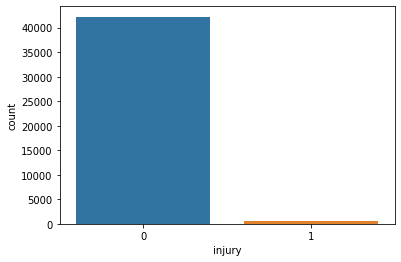

In [ ]:
print(df_week['injury'].value_counts())
sns.countplot(df_week['injury'])

**Interpretation:** 

In our entire dataset, there are total records of 42223 (98.6%) times an athlete didn't got injured, and 575 (1.4%) times an athlete got injured.

**4.3 Analysis on injury per athlete**

In [ ]:
df_ath_injury = pd.DataFrame()
df_ath_injury['Number of injury per Athlete'] = df_week.groupby('Athlete ID')['injury'].sum()

In [ ]:
df_ath_injury.head()

,Number of injury per Athlete
Athlete ID,
0,7
1,2
2,4
3,3
4,7


In [ ]:
df_ath_injury.shape

(74, 1)

In [ ]:
df_ath_injury.describe()

,Number of injury per Athlete
count,74.000000
mean,7.770270
std,8.281928
min,0.000000
25%,2.000000
50%,5.000000
75%,11.500000
max,35.000000


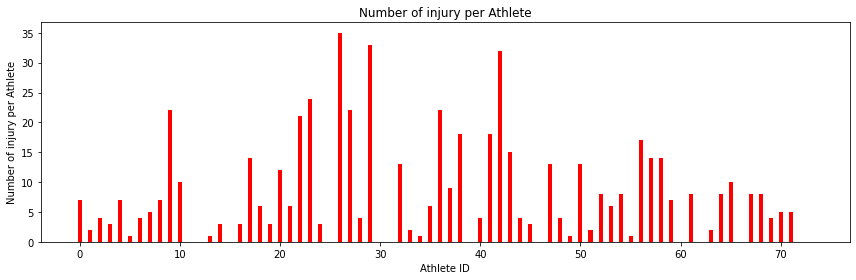

In [ ]:
plt.figure(figsize=(12,4))
ax = plt.subplot()
ax.bar(df_ath_injury.index, height = df_ath_injury['Number of injury per Athlete'], color = 'red', width = 0.4)
plt.title('Number of injury per Athlete')
plt.ylabel('Number of injury per Athlete')
plt.xlabel('Athlete ID')
plt.tight_layout()
plt.show()

Interpretation:

As shown from the above graph, the Athlete with ID number 26 has the most highest number of injuries with about 35.

**4.4 Analysis on nr.session**

In [ ]:
print(df_week['nr. sessions'].sum())
print(df_week['nr. sessions.1'].sum())
print(df_week['nr. sessions.2'].sum())

248628.0
248580.0
248690.0


In [ ]:
df_ath_ses = pd.DataFrame()
df_ath_ses['Day0'] = df_week.groupby('Athlete ID')['nr. sessions'].sum()
df_ath_ses['Day1'] = df_week.groupby('Athlete ID')['nr. sessions.1'].sum()
df_ath_ses['Day2'] = df_week.groupby('Athlete ID')['nr. sessions.2'].sum()

In [ ]:
df_ath_ses.head()

,Day0,Day1,Day2
Athlete ID,,,
0,1264.0,1278.0,1257.0
1,2774.0,2771.0,2704.0
2,7175.0,7175.0,7133.0
3,1956.0,1987.0,2015.0
4,4372.0,4318.0,4281.0


In [ ]:
df_ath_ses.reset_index(inplace=True)

In [ ]:
df_ath_ses.head()

,Athlete ID,Day0,Day1,Day2
0,0,1264.0,1278.0,1257.0
1,1,2774.0,2771.0,2704.0
2,2,7175.0,7175.0,7133.0
3,3,1956.0,1987.0,2015.0
4,4,4372.0,4318.0,4281.0


In [ ]:
df_ath_ses['Total'] = df_ath_ses.loc[0:,['Day0','Day1','Day2']].sum(axis=1)

In [ ]:
df_ath_ses.head()

,Athlete ID,Day0,Day1,Day2,Total
0,0,1264.0,1278.0,1257.0,3799.0
1,1,2774.0,2771.0,2704.0,8249.0
2,2,7175.0,7175.0,7133.0,21483.0
3,3,1956.0,1987.0,2015.0,5958.0
4,4,4372.0,4318.0,4281.0,12971.0


The dataframe above shows total number of sessions each Athlete had for their training.

Text(0, 0.5, 'Number of Sessions')

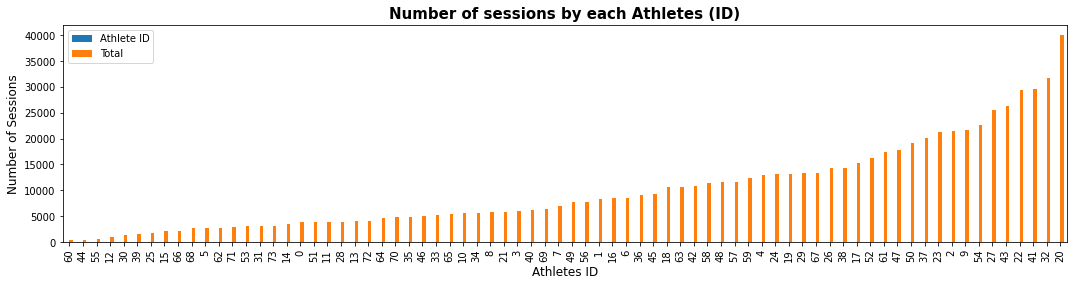

In [ ]:
df_ath_ses[['Athlete ID','Total']].sort_values('Total').plot(kind='bar', figsize=(18,4))
plt.title('Number of sessions by each Athletes (ID)', weight='bold', family='Arial', fontsize=15)
plt.xlabel('Athletes ID', fontsize=12)
plt.ylabel('Number of Sessions', fontsize=12)

**Interpretation:**

From the plot above, we can clearly see that Athleted ID 60 did least number of sessions whereas Athlete ID 20 did maximum number of sessions.

**4.5 Analysis on nr. rest days**

In [ ]:
df_ath_rest = pd.DataFrame()
df_ath_rest['Day0'] = df_week.groupby('Athlete ID')['nr. rest days'].sum()
df_ath_rest['Day1'] = df_week.groupby('Athlete ID')['nr. rest days.1'].sum()
df_ath_rest['Day2'] = df_week.groupby('Athlete ID')['nr. rest days.2'].sum()

In [ ]:
df_ath_rest.head()

,Day0,Day1,Day2
Athlete ID,,,
0,958.0,938.0,955.0
1,1072.0,1093.0,1145.0
2,2280.0,2281.0,2324.0
3,600.0,580.0,561.0
4,1055.0,1091.0,1125.0


In [ ]:
df_ath_rest.reset_index(inplace=True)

In [ ]:
df_ath_rest.head()

,Athlete ID,Day0,Day1,Day2
0,0,958.0,938.0,955.0
1,1,1072.0,1093.0,1145.0
2,2,2280.0,2281.0,2324.0
3,3,600.0,580.0,561.0
4,4,1055.0,1091.0,1125.0


In [ ]:
df_ath_rest['Total'] = df_ath_rest.loc[0:,['Day0','Day1','Day2']].sum(axis=1)

In [ ]:
df_ath_rest.head()

,Athlete ID,Day0,Day1,Day2,Total
0,0,958.0,938.0,955.0,2851.0
1,1,1072.0,1093.0,1145.0,3310.0
2,2,2280.0,2281.0,2324.0,6885.0
3,3,600.0,580.0,561.0,1741.0
4,4,1055.0,1091.0,1125.0,3271.0


The dataframe above shows the total number of rest days each Athlete had for their training.

Text(0, 0.5, 'Number of Rest Days')

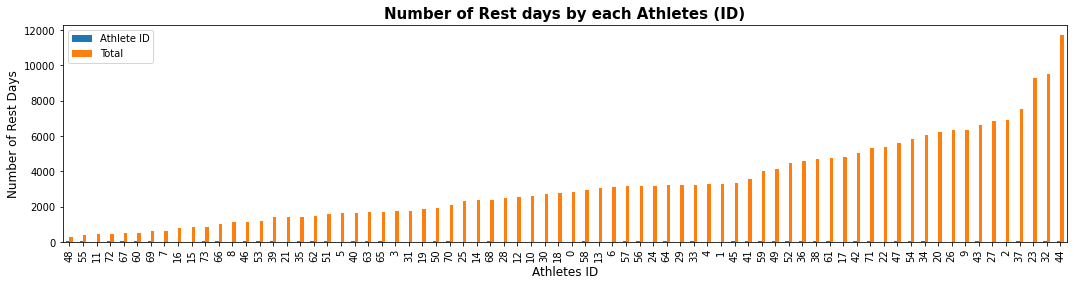

In [ ]:
df_ath_rest[['Athlete ID','Total']].sort_values('Total').plot(kind='bar', figsize=(18,4))
plt.title('Number of Rest days by each Athletes (ID)', weight='bold', family='Arial', fontsize=15)
plt.xlabel('Athletes ID', fontsize=12)
plt.ylabel('Number of Rest Days', fontsize=12)

**Interpretation:**

As shown from the above plot, Athlete 44 had the most number of Rest Days whereas Athlete 48 had the least.

**4.6 Analysis on nr. tough sessions (effort in Z5, T1 or T2)**

In [ ]:
df_ath_tses = pd.DataFrame()
df_ath_tses['Day0'] = df_week.groupby('Athlete ID')['nr. tough sessions (effort in Z5, T1 or T2)'].sum()
df_ath_tses['Day1'] = df_week.groupby('Athlete ID')['nr. tough sessions (effort in Z5, T1 or T2).1'].sum()
df_ath_tses['Day2'] = df_week.groupby('Athlete ID')['nr. tough sessions (effort in Z5, T1 or T2).2'].sum()

In [ ]:
df_ath_tses.head()

,Day0,Day1,Day2
Athlete ID,,,
0,154.0,161.0,157.0
1,299.0,297.0,285.0
2,815.0,825.0,841.0
3,720.0,716.0,727.0
4,725.0,704.0,694.0


In [ ]:
df_ath_tses.reset_index(inplace=True)

In [ ]:
df_ath_tses['Total'] = df_ath_tses.loc[0:,['Day0','Day1','Day2']].sum(axis=1)

In [ ]:
df_ath_tses.head()

,Athlete ID,Day0,Day1,Day2,Total
0,0,154.0,161.0,157.0,472.0
1,1,299.0,297.0,285.0,881.0
2,2,815.0,825.0,841.0,2481.0
3,3,720.0,716.0,727.0,2163.0
4,4,725.0,704.0,694.0,2123.0


Interpretation:

The dataframe above shows the total number of tough sessions each Athlete had for their training.

Text(0, 0.5, 'Number of tough sessions')

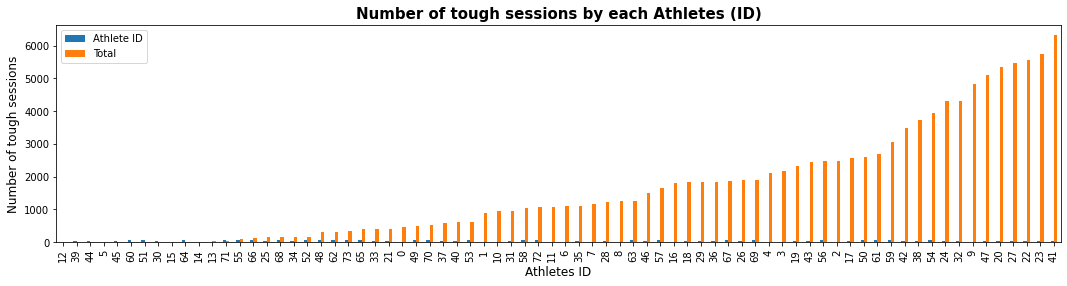

In [ ]:
df_ath_tses[['Athlete ID','Total']].sort_values('Total').plot(kind='bar', figsize=(18,4))
plt.title('Number of tough sessions by each Athletes (ID)', weight='bold', family='Arial', fontsize=15)
plt.xlabel('Athletes ID', fontsize=12)
plt.ylabel('Number of tough sessions', fontsize=12)

**Interpretation:**

Athlete 41 had the most number of tough sessions whereas Athlete 12 had the least.

# **5.0 Model Training**

In this section, we will build 3 models, namely Deep Neural Network Model (DNN), k-Nearest Neighbors (k-NN) and Xgboost Model.

## **Deep Neural Network Model (DNN)**

In [ ]:
mpl.rcParams['figure.figsize'] = (15, 18)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [ ]:
file = tf.keras.utils
raw_df = pd.read_csv('week_approach_maskedID_timeseries.csv')
convert_dict = {'nr. sessions': int } #convert nr.sessions to int 
raw_df = raw_df.astype(convert_dict)
raw_df.head()

,nr. sessions,nr. rest days,total kms,max km one day,total km Z3-Z4-Z5-T1-T2,"nr. tough sessions (effort in Z5, T1 or T2)",nr. days with interval session,total km Z3-4,max km Z3-4 one day,total km Z5-T1-T2,...,max training success.2,avg recovery.2,min recovery.2,max recovery.2,Athlete ID,injury,rel total kms week 0_1,rel total kms week 0_2,rel total kms week 1_2,Date
0,5,2.0,22.2,16.4,11.8,1.0,2.0,10.0,10.0,0.6,...,0.0,0.18,0.16,0.20,0,0,0.718447,1.378882,1.919255,0
1,5,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.18,0.16,0.20,0,0,0.683544,1.018868,1.490566,1
2,5,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.17,0.16,0.18,0,0,0.683544,1.018868,1.490566,2
3,5,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.18,0.16,0.18,0,0,0.683544,1.018868,1.490566,3
4,6,1.0,39.2,17.6,18.9,1.0,3.0,17.2,10.0,0.5,...,0.0,0.17,0.16,0.18,0,0,2.202247,1.361111,0.618056,4


In [ ]:
# This section displays the percentage of the majority class
neg, pos = np.bincount(raw_df['injury'])
total = neg + pos

print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(total, pos, 100 * pos / total))

Examples:
    Total: 42798
    Positive: 575 (1.34% of total)



In [ ]:
#Dropping the unnecessary columns/features
cleaned_df = raw_df.copy()
cleaned_df.pop('Date')
cleaned_df.pop('Athlete ID')

0         0
1         0
2         0
3         0
4         0
         ..
42793    71
42794    71
42795    71
42796    71
42797    71
Name: Athlete ID, Length: 42798, dtype: int64

In [ ]:
#split features into X and y label

X = cleaned_df.drop('injury', axis = 1)
y = cleaned_df['injury']

In [ ]:
X.shape[1]

69

**Applying Synthetic Minority Oversampling Technique (SMOTE)**

This is because the data is so imbalanced. The minority class is oversampled with new similar data is generated to compensate its minimal numbers


In [ ]:
smote_technique = SMOTE(sampling_strategy='minority')
X_smt, y_smt = smote_technique.fit_resample(X, y)

In [ ]:
y_smt.value_counts() #class counts now match

0    42223
1    42223
Name: injury, dtype: int64

In [ ]:
#Data is split to Train and test 
X_train_smt, X_test_smt, y_train_smt, y_test_smt = train_test_split(X_smt, y_smt, test_size=0.3, random_state=15, stratify=y_smt)

## **Defining the Deep Nearal Network Model**

In [ ]:
dnn_model = keras.Sequential([
    keras.layers.Dense(16, input_shape=(X.shape[1],), activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='loss', 
    verbose=1,
    patience=20,
    mode='min',
    restore_best_weights=True)

In [ ]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

In [ ]:
#Model compliation
dnn_model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              loss='binary_crossentropy',
              metrics=METRICS)

In [ ]:
#fit the model with epochs 300 and using early stopping callbacks method.

dnn_model.fit(X_train_smt, y_train_smt, callbacks = [early_stopping], epochs=300)

Epoch 1/300
1848/1848 [==============================] - 8s 3ms/step - loss: 4936.8198 - tp: 23246.0000 - fp: 21029.0000 - tn: 8527.0000 - fn: 6310.0000 - accuracy: 0.5375 - precision: 0.5250 - recall: 0.7865 - auc: 0.5314 - prc: 0.5089
Epoch 2/300
1848/1848 [==============================] - 6s 3ms/step - loss: 205.6235 - tp: 27452.0000 - fp: 24306.0000 - tn: 5250.0000 - fn: 2104.0000 - accuracy: 0.5532 - precision: 0.5304 - recall: 0.9288 - auc: 0.5798 - prc: 0.5409
Epoch 3/300
1848/1848 [==============================] - 6s 3ms/step - loss: 44.3430 - tp: 26740.0000 - fp: 22226.0000 - tn: 7330.0000 - fn: 2816.0000 - accuracy: 0.5764 - precision: 0.5461 - recall: 0.9047 - auc: 0.5943 - prc: 0.5494
Epoch 4/300
1848/1848 [==============================] - 6s 3ms/step - loss: 21.2073 - tp: 26516.0000 - fp: 21183.0000 - tn: 8373.0000 - fn: 3040.0000 - accuracy: 0.5902 - precision: 0.5559 - recall: 0.8971 - auc: 0.6017 - prc: 0.5544
Epoch 5/300
1848/1848 [==============================] - 

In [ ]:
#Using the trained model, the prediction is done on the test set
dnn_preds_smt = dnn_model.predict(X_test_smt)
dnn_preds_smt = np.round(dnn_preds_smt)

792/792 [==============================] - 1s 1ms/step


### **DNN Model Evaluation**

In [ ]:
#Display the classification report of the model out of prediction using the test data.

print(classification_report(y_test_smt,dnn_preds_smt))

              precision    recall  f1-score   support

           0       0.87      0.58      0.70     12667
           1       0.68      0.91      0.78     12667

    accuracy                           0.75     25334
   macro avg       0.78      0.75      0.74     25334
weighted avg       0.78      0.75      0.74     25334



In [ ]:
#function to display the confusion matrix
def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
    print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
    print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
    print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
    print('Total Fraudulent Transactions: ', np.sum(cm[1]))

Legitimate Transactions Detected (True Negatives):  7328
Legitimate Transactions Incorrectly Detected (False Positives):  5339
Fraudulent Transactions Missed (False Negatives):  1084
Fraudulent Transactions Detected (True Positives):  11583
Total Fraudulent Transactions:  12667


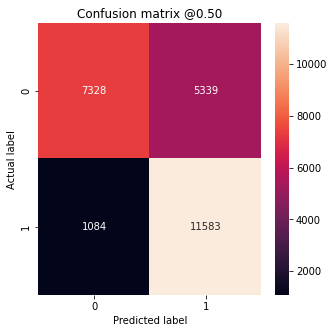

In [ ]:
plot_cm(y_test_smt, dnn_preds_smt)

**Saving the trained Model**

In [ ]:
# Calling `save('my_model')` creates a SavedModel folder `dnn_model`.
dnn_model.save("weekly_dnn_model")

**Sample prediction**

In [ ]:
def predict(model, record):
    k = np.array(record).reshape(1,69)
    prediction = int(np.round(dnn_model.predict(k))[0][0])
    return prediction

In [ ]:
#Sample record to predict
k = np.array(X_test_smt.iloc[1]).reshape(1,69)

In [ ]:
k

array([[1.00000000e+01, 7.04810237e-02, 8.31445265e+01, 1.74647595e+01,
        1.56986734e+01, 9.29518976e-01, 2.07048102e+00, 4.91625331e+00,
        4.14096205e+00, 8.36567079e-01, 8.36567079e-01, 0.00000000e+00,
        1.00000000e+00, 1.20837467e-01, 7.43615181e-02, 1.67313416e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.30132657e-01,
        1.11542277e-01, 1.39427846e-01, 4.92951898e+00, 3.07048102e+00,
        4.17647595e+01, 1.53211443e+01, 2.73830891e+00, 9.29518976e-01,
        1.00000000e+00, 5.07463371e-01, 5.07463371e-01, 1.58018226e+00,
        1.58018226e+00, 0.00000000e+00, 1.00000000e+00, 9.29518976e-02,
        7.43615181e-02, 1.30132657e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.20837467e-01, 8.36567079e-02, 1.30132657e-01,
        7.14096205e+00, 0.00000000e+00, 8.02043950e+01, 1.52819241e+01,
        1.39017418e+01, 9.29518976e-01, 2.07048102e+00, 6.93034951e+00,
        6.08457723e+00, 3.71807591e+00, 3.71807591e+00, 0.000000

In [ ]:
#Predict using the loaded saved model
reconstructed_model = keras.models.load_model("weekly_dnn_model")

In [ ]:
predict(reconstructed_model,k)

1/1 [==============================] - 0s 48ms/step


1

## **k-Nearest Neighbors Model (KNN)**

**Let Check the shape of training and test data**

In [ ]:
print("Training data size: ", X_train_smt.shape)
print("Test data size: ", X_test_smt.shape)

Training data size:  (59112, 69)
Test data size:  (25334, 69)


In [ ]:
#define model
knn_model = KNeighborsClassifier()

#fit model
knn_model.fit(X_train_smt, y_train_smt)

KNeighborsClassifier()

In [ ]:
#Using the trained model, the prediction is done on the test set
knn_preds_smt = knn_model.predict(X_test_smt)
knn_preds_smt = np.round(knn_preds_smt)

# **k-NN Model Evaluation**

In [ ]:
#Display the classification report of the model out of prediction using the test data
print(classification_report(y_test_smt, knn_preds_smt))

              precision    recall  f1-score   support

           0       0.98      0.87      0.93     12667
           1       0.89      0.99      0.93     12667

    accuracy                           0.93     25334
   macro avg       0.93      0.93      0.93     25334
weighted avg       0.93      0.93      0.93     25334



In [ ]:
#function to display the confusion matrix
def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print('Correct Non-injury predictions (True Negatives): ', cm[0][0])
    print('Incorrect Non-injury predictions (False Positives): ', cm[0][1])
    print('Correct injury predictions (False Negatives): ', cm[1][0])
    print('Incorrect injury predictions (True Positives): ', cm[1][1])
    print('Total injury predictions: ', np.sum(cm[1]))

Correct Non-injury predictions (True Negatives):  11059
Incorrect Non-injury predictions (False Positives):  1608
Correct injury predictions (False Negatives):  183
Incorrect injury predictions (True Positives):  12484
Total injury predictions:  12667


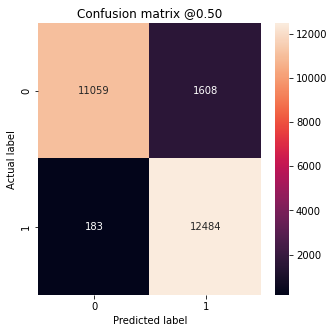

In [ ]:
plot_cm(y_test_smt, knn_preds_smt)


# **Optimize KNN Model**

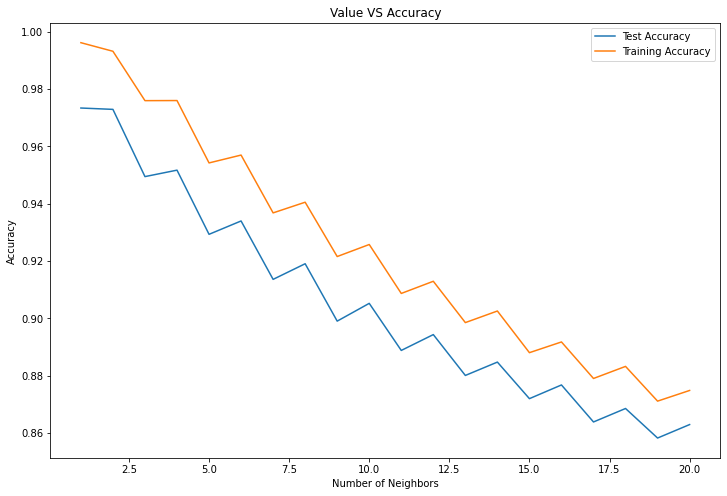

Best accuracy is 0.9733559643167286 with n = 1


In [ ]:
# set range of n values
neighbor = range(1, 21)
train_acc = []
test_acc = []

# Loop through different values of n
for i, n in enumerate(neighbor):
    # n from 1 to 20
    knn_model = KNeighborsClassifier(n_neighbors=n)
    
    # Fit with knn
    knn_model.fit(X_train_smt,y_train_smt)
    
    # train accuracy
    train_acc.append(knn_model.score(X_train_smt, y_train_smt))
    
    # test accuracy
    test_acc.append(knn_model.score(X_test_smt, y_test_smt))

# line plot
plt.figure(figsize=[12, 8])
plt.plot(neighbor, test_acc, label = 'Test Accuracy')
plt.plot(neighbor, train_acc, label = 'Training Accuracy')
plt.legend()
plt.title('Value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
#plt.xticks(neig)
#plt.savefig('graph.png')
plt.show()

# print best score
print("Best accuracy is {} with n = {}".format(np.max(test_acc), 1+test_acc.index(np.max(test_acc))))

In [ ]:
knn_model_imp = KNeighborsClassifier(n_neighbors=1)
knn_model_imp.fit(X_train_smt, y_train_smt)

knn_preds_smt_imp = knn_model_imp.predict(X_test_smt)
knn_preds_smt_imp = np.round(knn_preds_smt_imp)

#Display the classification report of the model out of prediction using the test data
print(classification_report(y_test_smt, knn_preds_smt_imp))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97     12667
           1       0.96      0.99      0.97     12667

    accuracy                           0.97     25334
   macro avg       0.97      0.97      0.97     25334
weighted avg       0.97      0.97      0.97     25334



Correct Non-injury predictions (True Negatives):  12157
Incorrect Non-injury predictions (False Positives):  510
Correct injury predictions (False Negatives):  165
Incorrect injury predictions (True Positives):  12502
Total injury predictions:  12667


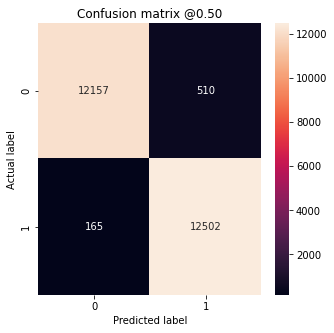

In [ ]:
plot_cm(y_test_smt, knn_preds_smt_imp)

**Saving Model**

In [ ]:
import pickle
file_name = "knn_model_week.pkl"

# save
pickle.dump(knn_model_imp, open(file_name, "wb"))

# **Xgboost Model**

In [122]:
raw_df = pd.read_csv('week_approach_maskedID_timeseries.csv')

convert_dict = {'nr. sessions': int } #convert nr.sessions to int 
raw_df = raw_df.astype(convert_dict)
raw_df.head()

,nr. sessions,nr. rest days,total kms,max km one day,total km Z3-Z4-Z5-T1-T2,"nr. tough sessions (effort in Z5, T1 or T2)",nr. days with interval session,total km Z3-4,max km Z3-4 one day,total km Z5-T1-T2,...,max training success.2,avg recovery.2,min recovery.2,max recovery.2,Athlete ID,injury,rel total kms week 0_1,rel total kms week 0_2,rel total kms week 1_2,Date
0,5,2.0,22.2,16.4,11.8,1.0,2.0,10.0,10.0,0.6,...,0.0,0.18,0.16,0.20,0,0,0.718447,1.378882,1.919255,0
1,5,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.18,0.16,0.20,0,0,0.683544,1.018868,1.490566,1
2,5,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.17,0.16,0.18,0,0,0.683544,1.018868,1.490566,2
3,5,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.18,0.16,0.18,0,0,0.683544,1.018868,1.490566,3
4,6,1.0,39.2,17.6,18.9,1.0,3.0,17.2,10.0,0.5,...,0.0,0.17,0.16,0.18,0,0,2.202247,1.361111,0.618056,4


In [123]:
neg, pos = np.bincount(raw_df['injury'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 42798
    Positive: 575 (1.34% of total)



In [124]:
cleaned_df = raw_df.copy()

# You don't want the `Time` column.
cleaned_df.pop('Date')
cleaned_df.pop('Athlete ID')

0         0
1         0
2         0
3         0
4         0
         ..
42793    71
42794    71
42795    71
42796    71
42797    71
Name: Athlete ID, Length: 42798, dtype: int64

In [125]:
cleaned_df.head()

,nr. sessions,nr. rest days,total kms,max km one day,total km Z3-Z4-Z5-T1-T2,"nr. tough sessions (effort in Z5, T1 or T2)",nr. days with interval session,total km Z3-4,max km Z3-4 one day,total km Z5-T1-T2,...,avg training success.2,min training success.2,max training success.2,avg recovery.2,min recovery.2,max recovery.2,injury,rel total kms week 0_1,rel total kms week 0_2,rel total kms week 1_2
0,5,2.0,22.2,16.4,11.8,1.0,2.0,10.0,10.0,0.6,...,0.0,0.0,0.0,0.18,0.16,0.20,0,0.718447,1.378882,1.919255
1,5,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.0,0.0,0.18,0.16,0.20,0,0.683544,1.018868,1.490566
2,5,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.0,0.0,0.17,0.16,0.18,0,0.683544,1.018868,1.490566
3,5,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.0,0.0,0.18,0.16,0.18,0,0.683544,1.018868,1.490566
4,6,1.0,39.2,17.6,18.9,1.0,3.0,17.2,10.0,0.5,...,0.0,0.0,0.0,0.17,0.16,0.18,0,2.202247,1.361111,0.618056


In [126]:
y = cleaned_df['injury']
X = cleaned_df.drop('injury', axis=1)

In [127]:
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0: 42223, 1: 575})


In [128]:
#split train and test
X_train_smt, X_test_smt, y_train_smt, y_test_smt = train_test_split(X, y, test_size=0.3, random_state=15, stratify=y)

In [129]:
#model definition
xgb_classifier = XGBClassifier(
    learning_rate =0.003, 
    n_estimators=1000,

)

In [130]:
X_train_smt.shape

(29958, 69)

Generate weights to use on the XGBOOT, this is because the data is so imbalanced

In [131]:
from sklearn.utils.class_weight import compute_sample_weight

In [132]:
sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=y_train_smt #provide your own target name
)

xgb_classifier.fit(X_train_smt, y_train_smt, sample_weight=sample_weights)

XGBClassifier(learning_rate=0.003, n_estimators=1000)

In [133]:
# Performance on the train
auc = roc_auc_score(y_train_smt, xgb_classifier.predict(X_train_smt))
print("Performance sur le train : ", auc)

# Performance on the test
auc = roc_auc_score(y_test_smt, xgb_classifier.predict(X_test_smt))
print("Performance sur le test : ", auc)

Performance sur le train :  0.7468981220571926
Performance sur le test :  0.6137289055216527


In [134]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test_smt, xgb_classifier.predict(X_test_smt)).ravel()
# Error rate : 
err_rate = (fp + fn) / (tp + tn + fn + fp)
print("Error rate  : ", err_rate)
# Accuracy : 
acc_ = (tp + tn) / (tp + tn + fn + fp)
print("Accuracy  : ", acc_)
# Sensitivity : 
sens_ = tp / (tp + fn)
print("Sensitivity  : ", sens_)
# Specificity 
sp_ = tn / (tn + fp)
print("Specificity  : ", sens_)
# False positive rate (FPR)
FPR = fp / (tn + fp)
print("False positive rate  : ", FPR)

Error rate  :  0.30654205607476637
Accuracy  :  0.6934579439252336
Sensitivity  :  0.5317919075144508
Specificity  :  0.5317919075144508
False positive rate  :  0.3043340964711455


In [135]:
tn, fp, fn, tp = confusion_matrix(y_train_smt, xgb_classifier.predict(X_train_smt)).ravel()
# Error rate : 
err_rate = (fp + fn) / (tp + tn + fn + fp)
print("Error rate  on train set : ", err_rate)
# Accuracy : 
acc_ = (tp + tn) / (tp + tn + fn + fp)
print("Accuracy  on train set  : ", acc_)

tn, fp, fn, tp = confusion_matrix(y_test_smt, xgb_classifier.predict(X_test_smt)).ravel()
# Error rate : 
err_rate = (fp + fn) / (tp + tn + fn + fp)
print("Error rate  on test set : ", err_rate)
# Accuracy : 
acc_ = (tp + tn) / (tp + tn + fn + fp)
print("Accuracy  on test set  : ", acc_)

Error rate  on train set :  0.2984845450297083
Accuracy  on train set  :  0.7015154549702918
Error rate  on test set :  0.30654205607476637
Accuracy  on test set  :  0.6934579439252336


In [136]:
X_train_smt.iloc[0]

nr. sessions                7.000000
nr. rest days               0.000000
total kms                  18.700000
max km one day              8.500000
total km Z3-Z4-Z5-T1-T2     0.800000
                             ...    
min recovery.2              0.180000
max recovery.2              0.210000
rel total kms week 0_1      0.519444
rel total kms week 0_2      0.444181
rel total kms week 1_2      0.855107
Name: 32895, Length: 69, dtype: float64

In [141]:
sample_record= np.array(X_test_smt.iloc[700]).reshape(1,69)
sample_record

'''
sample_record = np.array(X_test_smt.iloc[700]).reshape(1,69)

xgb_classifier.predict(sample_record)[0]'''

'\nsample_record = np.array(X_test_smt.iloc[700]).reshape(1,69)\n\nxgb_classifier.predict(sample_record)[0]'

In [144]:
#xgb_model_loaded.predict(sample_record)[0]

In [ ]:
print(classification_report(y_test_smt,xgb_classifier.predict(X_test_smt)))

              precision    recall  f1-score   support

           0       0.99      0.70      0.82     12667
           1       0.02      0.53      0.04       173

    accuracy                           0.69     12840
   macro avg       0.51      0.61      0.43     12840
weighted avg       0.98      0.69      0.81     12840



In [ ]:
def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print('True Negatives: ', cm[0][0])
    print('False Positives: ', cm[0][1])
    print('False Negatives: ', cm[1][0])
    print('True Positives: ', cm[1][1])
    print('Total Injuries: ', np.sum(cm[1]))

True Negatives:  8812
False Positives:  3855
False Negatives:  81
True Positives:  92
Total Injuries:  173


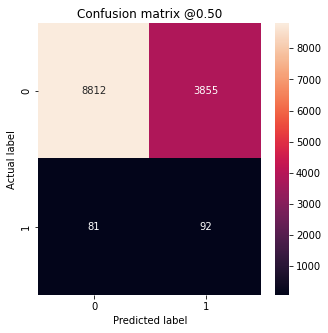

In [ ]:
plot_cm(y_test_smt, xgb_classifier.predict(X_test_smt))

Save the model

In [145]:
'''import pickle
file_name = "xgb_model_weekly.pkl"

# save
pickle.dump(xgb_classifier, open(file_name, "wb"))

# load
xgb_model_loaded = pickle.load(open(file_name, "rb"))

# test
k = np.array(X_test_smt.iloc[700]).reshape(1,69)
xgb_model_loaded.predict(k)[0]'''

'import pickle\nfile_name = "xgb_model_weekly.pkl"\n\n# save\npickle.dump(xgb_classifier, open(file_name, "wb"))\n\n# load\nxgb_model_loaded = pickle.load(open(file_name, "rb"))\n\n# test\nk = np.array(X_test_smt.iloc[700]).reshape(1,69)\nxgb_model_loaded.predict(k)[0]'

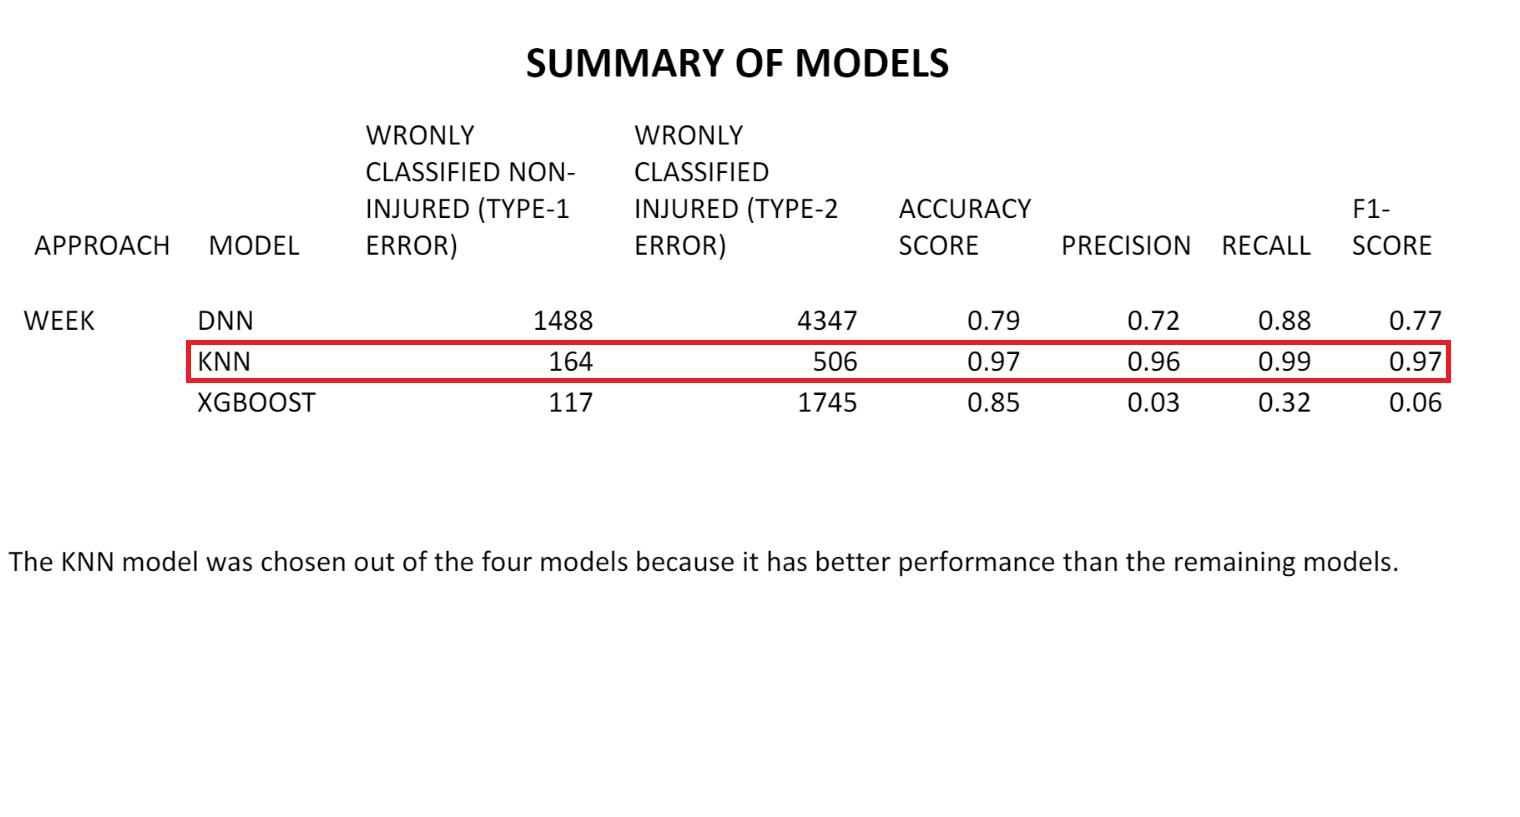

# **THANK YOU FOR TAKING TIME TO STUDY OUR NOTEBOOK. WE HOPE YOU GOT SOME INSIGHTS.**